# Project 2: Data Wrangling - We Rate Dogs Twitter Data

In [1]:
#importing packages for use
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import tweepy as tw
import json
import bs4
from timeit import default_timer as timer
%matplotlib inline

## Gathering

### 1. Twitter Archive Enhanced Dataset

In [2]:
# Loading the twitter-archive-enhanced dataset
archive = pd.read_csv('twitter-archive-enhanced.csv')
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### 2. Image Predictions Dataset

In [3]:
# web scraping for the image-predictions dataset
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open("image-predictions.tsv",mode='wb') as file:
    file.write(response.content)
    


In [4]:
#Loading the image-predictions dataset
images = pd.read_csv('image-predictions.tsv', sep='\t')
images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### 3. Additional Twitter Data 

In [5]:
#Querying additional tweets data from twitter API
consumer_key = " " 
consumer_secret = " "
access_key = " "
access_secret = " "

auth = tw.OAuthHandler(consumer_key, consumer_secret)
  
auth.set_access_token(access_key, access_secret)
  
api = tw.API(auth, wait_on_rate_limit=True)
  


In [6]:
count = 0
start = timer()
failed= {}

with open('tweet_json.txt', 'w') as outfile:
        tweets = archive.tweet_id
        for tweet_id in tweets:
            count += 1
            print(f'id: {tweet_id} - count {count}')
            try:
                api_tweets = api.get_status(tweet_id, tweet_mode='extended')
                print("Succeeded")
                json.dump(api_tweets._json, outfile)
                outfile.write('\n')
            except tw.TweepyException as e:
                print("Failed")
                failed[tweet_id] = e
end = timer()
print(f'Query Duration in: {round((end - start)/60,2)} minutes')
print(f'The number of failed tweets: {len(failed)}')

id: 892420643555336193 - count 1
Succeeded
id: 892177421306343426 - count 2
Succeeded
id: 891815181378084864 - count 3
Succeeded
id: 891689557279858688 - count 4
Succeeded
id: 891327558926688256 - count 5
Succeeded
id: 891087950875897856 - count 6
Succeeded
id: 890971913173991426 - count 7
Succeeded
id: 890729181411237888 - count 8
Succeeded
id: 890609185150312448 - count 9
Succeeded
id: 890240255349198849 - count 10
Succeeded
id: 890006608113172480 - count 11
Succeeded
id: 889880896479866881 - count 12
Succeeded
id: 889665388333682689 - count 13
Succeeded
id: 889638837579907072 - count 14
Succeeded
id: 889531135344209921 - count 15
Succeeded
id: 889278841981685760 - count 16
Succeeded
id: 888917238123831296 - count 17
Succeeded
id: 888804989199671297 - count 18
Succeeded
id: 888554962724278272 - count 19
Succeeded
id: 888202515573088257 - count 20
Failed
id: 888078434458587136 - count 21
Succeeded
id: 887705289381826560 - count 22
Succeeded
id: 887517139158093824 - count 23
Succeeded


Failed
id: 856288084350160898 - count 187
Succeeded
id: 856282028240666624 - count 188
Succeeded
id: 855862651834028034 - count 189
Succeeded
id: 855860136149123072 - count 190
Succeeded
id: 855857698524602368 - count 191
Succeeded
id: 855851453814013952 - count 192
Succeeded
id: 855818117272018944 - count 193
Succeeded
id: 855459453768019968 - count 194
Succeeded
id: 855245323840757760 - count 195
Succeeded
id: 855138241867124737 - count 196
Succeeded
id: 854732716440526848 - count 197
Succeeded
id: 854482394044301312 - count 198
Succeeded
id: 854365224396361728 - count 199
Succeeded
id: 854120357044912130 - count 200
Succeeded
id: 854010172552949760 - count 201
Succeeded
id: 853760880890318849 - count 202
Succeeded
id: 853639147608842240 - count 203
Succeeded
id: 853299958564483072 - count 204
Succeeded
id: 852936405516943360 - count 205
Succeeded
id: 852912242202992640 - count 206
Succeeded
id: 852672615818899456 - count 207
Succeeded
id: 852553447878664193 - count 208
Succeeded
id:

Succeeded
id: 828650029636317184 - count 370
Succeeded
id: 828409743546925057 - count 371
Succeeded
id: 828408677031882754 - count 372
Succeeded
id: 828381636999917570 - count 373
Succeeded
id: 828376505180889089 - count 374
Succeeded
id: 828372645993398273 - count 375
Succeeded
id: 828361771580813312 - count 376
Succeeded
id: 828046555563323392 - count 377
Succeeded
id: 828011680017821696 - count 378
Succeeded
id: 827933404142436356 - count 379
Succeeded
id: 827653905312006145 - count 380
Succeeded
id: 827600520311402496 - count 381
Succeeded
id: 827324948884643840 - count 382
Succeeded
id: 827228250799742977 - count 383
Failed
id: 827199976799354881 - count 384
Succeeded
id: 826958653328592898 - count 385
Succeeded
id: 826848821049180160 - count 386
Succeeded
id: 826615380357632002 - count 387
Succeeded
id: 826598799820865537 - count 388
Succeeded
id: 826598365270007810 - count 389
Succeeded
id: 826476773533745153 - count 390
Succeeded
id: 826240494070030336 - count 391
Succeeded
id:

Succeeded
id: 804413760345620481 - count 553
Succeeded
id: 804026241225523202 - count 554
Succeeded
id: 803773340896923648 - count 555
Succeeded
id: 803692223237865472 - count 556
Succeeded
id: 803638050916102144 - count 557
Succeeded
id: 803380650405482500 - count 558
Succeeded
id: 803321560782307329 - count 559
Succeeded
id: 803276597545603072 - count 560
Succeeded
id: 802952499103731712 - count 561
Succeeded
id: 802624713319034886 - count 562
Succeeded
id: 802600418706604034 - count 563
Succeeded
id: 802572683846291456 - count 564
Succeeded
id: 802323869084381190 - count 565
Succeeded
id: 802265048156610565 - count 566
Succeeded
id: 802247111496568832 - count 567
Failed
id: 802239329049477120 - count 568
Succeeded
id: 802185808107208704 - count 569
Succeeded
id: 801958328846974976 - count 570
Succeeded
id: 801854953262350336 - count 571
Succeeded
id: 801538201127157760 - count 572
Succeeded
id: 801285448605831168 - count 573
Succeeded
id: 801167903437357056 - count 574
Succeeded
id:

Succeeded
id: 781163403222056960 - count 736
Succeeded
id: 780931614150983680 - count 737
Succeeded
id: 780858289093574656 - count 738
Succeeded
id: 780800785462489090 - count 739
Succeeded
id: 780601303617732608 - count 740
Succeeded
id: 780543529827336192 - count 741
Succeeded
id: 780496263422808064 - count 742
Succeeded
id: 780476555013349377 - count 743
Succeeded
id: 780459368902959104 - count 744
Succeeded
id: 780192070812196864 - count 745
Succeeded
id: 780092040432480260 - count 746
Succeeded
id: 780074436359819264 - count 747
Succeeded
id: 779834332596887552 - count 748
Succeeded
id: 779377524342161408 - count 749
Succeeded
id: 779124354206535695 - count 750
Succeeded
id: 779123168116150273 - count 751
Failed
id: 779056095788752897 - count 752
Succeeded
id: 778990705243029504 - count 753
Succeeded
id: 778774459159379968 - count 754
Succeeded
id: 778764940568104960 - count 755
Succeeded
id: 778748913645780993 - count 756
Succeeded
id: 778650543019483137 - count 757
Succeeded
id:

Rate limit reached. Sleeping for: 216


Succeeded
id: 758474966123810816 - count 902
Succeeded
id: 758467244762497024 - count 903
Succeeded
id: 758405701903519748 - count 904
Succeeded
id: 758355060040593408 - count 905
Succeeded
id: 758099635764359168 - count 906
Succeeded
id: 758041019896193024 - count 907
Succeeded
id: 757741869644341248 - count 908
Succeeded
id: 757729163776290825 - count 909
Succeeded
id: 757725642876129280 - count 910
Succeeded
id: 757611664640446465 - count 911
Succeeded
id: 757597904299253760 - count 912
Succeeded
id: 757596066325864448 - count 913
Succeeded
id: 757400162377592832 - count 914
Succeeded
id: 757393109802180609 - count 915
Succeeded
id: 757354760399941633 - count 916
Succeeded
id: 756998049151549440 - count 917
Succeeded
id: 756939218950160384 - count 918
Succeeded
id: 756651752796094464 - count 919
Succeeded
id: 756526248105566208 - count 920
Succeeded
id: 756303284449767430 - count 921
Succeeded
id: 756288534030475264 - count 922
Succeeded
id: 756275833623502848 - count 923
Succeeded


Succeeded
id: 738883359779196928 - count 1083
Succeeded
id: 738537504001953792 - count 1084
Succeeded
id: 738402415918125056 - count 1085
Succeeded
id: 738184450748633089 - count 1086
Succeeded
id: 738166403467907072 - count 1087
Succeeded
id: 738156290900254721 - count 1088
Succeeded
id: 737826014890496000 - count 1089
Succeeded
id: 737800304142471168 - count 1090
Succeeded
id: 737678689543020544 - count 1091
Succeeded
id: 737445876994609152 - count 1092
Succeeded
id: 737322739594330112 - count 1093
Succeeded
id: 737310737551491075 - count 1094
Succeeded
id: 736736130620620800 - count 1095
Succeeded
id: 736392552031657984 - count 1096
Succeeded
id: 736365877722001409 - count 1097
Succeeded
id: 736225175608430592 - count 1098
Succeeded
id: 736010884653420544 - count 1099
Succeeded
id: 735991953473572864 - count 1100
Succeeded
id: 735648611367784448 - count 1101
Succeeded
id: 735635087207878657 - count 1102
Succeeded
id: 735274964362878976 - count 1103
Succeeded
id: 735256018284875776 -

Succeeded
id: 710153181850935296 - count 1262
Succeeded
id: 710140971284037632 - count 1263
Succeeded
id: 710117014656950272 - count 1264
Succeeded
id: 709918798883774466 - count 1265
Succeeded
id: 709901256215666688 - count 1266
Succeeded
id: 709852847387627521 - count 1267
Succeeded
id: 709566166965075968 - count 1268
Succeeded
id: 709556954897764353 - count 1269
Succeeded
id: 709519240576036864 - count 1270
Succeeded
id: 709449600415961088 - count 1271
Succeeded
id: 709409458133323776 - count 1272
Succeeded
id: 709225125749587968 - count 1273
Succeeded
id: 709207347839836162 - count 1274
Succeeded
id: 709198395643068416 - count 1275
Succeeded
id: 709179584944730112 - count 1276
Succeeded
id: 709158332880297985 - count 1277
Succeeded
id: 709042156699303936 - count 1278
Succeeded
id: 708853462201716736 - count 1279
Succeeded
id: 708845821941387268 - count 1280
Succeeded
id: 708834316713893888 - count 1281
Succeeded
id: 708810915978854401 - count 1282
Succeeded
id: 708738143638450176 -

Succeeded
id: 696886256886657024 - count 1441
Succeeded
id: 696877980375769088 - count 1442
Succeeded
id: 696754882863349760 - count 1443
Succeeded
id: 696744641916489729 - count 1444
Succeeded
id: 696713835009417216 - count 1445
Succeeded
id: 696518437233913856 - count 1446
Succeeded
id: 696490539101908992 - count 1447
Succeeded
id: 696488710901260288 - count 1448
Succeeded
id: 696405997980676096 - count 1449
Succeeded
id: 696100768806522880 - count 1450
Succeeded
id: 695816827381944320 - count 1451
Succeeded
id: 695794761660297217 - count 1452
Succeeded
id: 695767669421768709 - count 1453
Succeeded
id: 695629776980148225 - count 1454
Succeeded
id: 695446424020918272 - count 1455
Succeeded
id: 695409464418041856 - count 1456
Succeeded
id: 695314793360662529 - count 1457
Succeeded
id: 695095422348574720 - count 1458
Succeeded
id: 695074328191332352 - count 1459
Succeeded
id: 695064344191721472 - count 1460
Succeeded
id: 695051054296211456 - count 1461
Succeeded
id: 694925794720792577 -

Succeeded
id: 684959798585110529 - count 1620
Succeeded
id: 684940049151070208 - count 1621
Succeeded
id: 684926975086034944 - count 1622
Succeeded
id: 684914660081053696 - count 1623
Succeeded
id: 684902183876321280 - count 1624
Succeeded
id: 684880619965411328 - count 1625
Succeeded
id: 684830982659280897 - count 1626
Succeeded
id: 684800227459624960 - count 1627
Succeeded
id: 684594889858887680 - count 1628
Succeeded
id: 684588130326986752 - count 1629
Succeeded
id: 684567543613382656 - count 1630
Succeeded
id: 684538444857667585 - count 1631
Succeeded
id: 684481074559381504 - count 1632
Succeeded
id: 684460069371654144 - count 1633
Succeeded
id: 684241637099323392 - count 1634
Succeeded
id: 684225744407494656 - count 1635
Succeeded
id: 684222868335505415 - count 1636
Succeeded
id: 684200372118904832 - count 1637
Succeeded
id: 684195085588783105 - count 1638
Succeeded
id: 684188786104872960 - count 1639
Succeeded
id: 684177701129875456 - count 1640
Succeeded
id: 684147889187209216 -

Succeeded
id: 677228873407442944 - count 1799
Succeeded
id: 677187300187611136 - count 1800
Succeeded
id: 676975532580409345 - count 1801


Rate limit reached. Sleeping for: 178


Succeeded
id: 676957860086095872 - count 1802
Succeeded
id: 676949632774234114 - count 1803
Succeeded
id: 676948236477857792 - count 1804
Succeeded
id: 676946864479084545 - count 1805
Succeeded
id: 676942428000112642 - count 1806
Succeeded
id: 676936541936185344 - count 1807
Succeeded
id: 676916996760600576 - count 1808
Succeeded
id: 676897532954456065 - count 1809
Succeeded
id: 676864501615042560 - count 1810
Succeeded
id: 676821958043033607 - count 1811
Succeeded
id: 676819651066732545 - count 1812
Succeeded
id: 676811746707918848 - count 1813
Succeeded
id: 676776431406465024 - count 1814
Succeeded
id: 676617503762681856 - count 1815
Succeeded
id: 676613908052996102 - count 1816
Succeeded
id: 676606785097199616 - count 1817
Succeeded
id: 676603393314578432 - count 1818
Succeeded
id: 676593408224403456 - count 1819
Succeeded
id: 676590572941893632 - count 1820
Succeeded
id: 676588346097852417 - count 1821
Succeeded
id: 676582956622721024 - count 1822
Succeeded
id: 676575501977128964 -

Succeeded
id: 672975131468300288 - count 1981
Succeeded
id: 672970152493887488 - count 1982
Succeeded
id: 672968025906282496 - count 1983
Succeeded
id: 672964561327235073 - count 1984
Succeeded
id: 672902681409806336 - count 1985
Succeeded
id: 672898206762672129 - count 1986
Succeeded
id: 672884426393653248 - count 1987
Succeeded
id: 672877615439593473 - count 1988
Succeeded
id: 672834301050937345 - count 1989
Succeeded
id: 672828477930868736 - count 1990
Succeeded
id: 672640509974827008 - count 1991
Succeeded
id: 672622327801233409 - count 1992
Succeeded
id: 672614745925664768 - count 1993
Succeeded
id: 672609152938721280 - count 1994
Succeeded
id: 672604026190569472 - count 1995
Succeeded
id: 672594978741354496 - count 1996
Succeeded
id: 672591762242805761 - count 1997
Succeeded
id: 672591271085670400 - count 1998
Succeeded
id: 672538107540070400 - count 1999
Succeeded
id: 672523490734551040 - count 2000
Succeeded
id: 672488522314567680 - count 2001
Succeeded
id: 672482722825261057 -

Succeeded
id: 669571471778410496 - count 2160
Succeeded
id: 669567591774625800 - count 2161
Succeeded
id: 669564461267722241 - count 2162
Succeeded
id: 669393256313184256 - count 2163
Succeeded
id: 669375718304980992 - count 2164
Succeeded
id: 669371483794317312 - count 2165
Succeeded
id: 669367896104181761 - count 2166
Succeeded
id: 669363888236994561 - count 2167
Succeeded
id: 669359674819481600 - count 2168
Succeeded
id: 669354382627049472 - count 2169
Succeeded
id: 669353438988365824 - count 2170
Succeeded
id: 669351434509529089 - count 2171
Succeeded
id: 669328503091937280 - count 2172
Succeeded
id: 669327207240699904 - count 2173
Succeeded
id: 669324657376567296 - count 2174
Succeeded
id: 669216679721873412 - count 2175
Succeeded
id: 669214165781868544 - count 2176
Succeeded
id: 669203728096960512 - count 2177
Succeeded
id: 669037058363662336 - count 2178
Succeeded
id: 669015743032369152 - count 2179
Succeeded
id: 669006782128353280 - count 2180
Succeeded
id: 669000397445533696 -

Succeeded
id: 666104133288665088 - count 2339
Succeeded
id: 666102155909144576 - count 2340
Succeeded
id: 666099513787052032 - count 2341
Succeeded
id: 666094000022159362 - count 2342
Succeeded
id: 666082916733198337 - count 2343
Succeeded
id: 666073100786774016 - count 2344
Succeeded
id: 666071193221509120 - count 2345
Succeeded
id: 666063827256086533 - count 2346
Succeeded
id: 666058600524156928 - count 2347
Succeeded
id: 666057090499244032 - count 2348
Succeeded
id: 666055525042405380 - count 2349
Succeeded
id: 666051853826850816 - count 2350
Succeeded
id: 666050758794694657 - count 2351
Succeeded
id: 666049248165822465 - count 2352
Succeeded
id: 666044226329800704 - count 2353
Succeeded
id: 666033412701032449 - count 2354
Succeeded
id: 666029285002620928 - count 2355
Succeeded
id: 666020888022790149 - count 2356
Succeeded
Query Duration in: 37.05 minutes
The number of failed tweets: 29


In [7]:
# read contents in the tweet_json.txt file
content = [] #list for the dictionaries in the json file

#lists for the required attributes
tweet_id = []
retweet_count = []
favourite_count =[]

with open('tweet_json.txt') as f: #open the txt file and read the contents line by line
    for line in f:
        content_dict = json.loads(line)
        content.append(content_dict)

for col in content: #check for the required attributes in the list
    tweet_id.append(col['id'])
    retweet_count.append(col['retweet_count'])
    favourite_count.append(col['favorite_count'])
    
#load the attributes and variables as key value pairs into a dictionary
json_data = {'tweet_id':tweet_id,'retweet_count':retweet_count,'favourite_count':favourite_count}


In [8]:
# dataframe containing tweet_id, retweet and favourite counts
additional_tweets = pd.DataFrame(json_data)
additional_tweets.head()

,tweet_id,retweet_count,favourite_count
0,892420643555336193,7010,33831
1,892177421306343426,5302,29345
2,891815181378084864,3482,22068
3,891689557279858688,7228,36956
4,891327558926688256,7767,35328


## Assessing

In [9]:
# creating copies of datasets before assessment and cleaning
archive_clean = archive.copy()

images_clean = images.copy()

additional_tweets_clean = additional_tweets.copy()

### 1. Twitter Archive Data

In [10]:
archive_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
868,761750502866649088,NaN,NaN,2016-08-06 02:27:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: ""Tristan do not speak to me wit...",6.853251e+17,4.196984e+09,2016-01-08 05:00:14 +0000,https://twitter.com/dog_rates/status/685325112...,10,10,None,None,None,None,None
769,777189768882946048,NaN,NaN,2016-09-17 16:57:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jeffrey. He's being held so he doesn't...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/777189768...,12,10,Jeffrey,None,None,None,None
442,819588359383371776,NaN,NaN,2017-01-12 16:54:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jazzy. She just found out that sandwic...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/819588359...,13,10,Jazzy,None,None,None,None
898,758854675097526272,NaN,NaN,2016-07-29 02:40:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lilli Bee &amp; Honey Bear. Unfortunat...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758854675...,11,10,Lilli,None,None,None,None
1102,735274964362878976,NaN,NaN,2016-05-25 01:03:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please stop sending in your...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/735274964...,11,10,None,None,None,None,None


In [11]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [12]:
archive_clean.source.unique()


array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

#### Quality Issues
* Data type for the `tweet_id` column should be a string instead of integer.
* `in_reply_to_status_id` and `in_reply_to_user_id` columns do not offer worthwhile information hence should be dropped.
* Data type for the `timestamp` column should be datetime instead of string.
* From `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp` columns, we see **181** tweets are a result of retweeting existing tweets.Hence, original tweets should be kept and the 3 columns dropped.
* `expanded_urls` column does not offer worthwhile information hence should be dropped.
* The source column not only indicate the source of the tweet but includes the HTML tags and attributes.
* `doggo`, `floofer`, `pupper`, and `puppo` columns are unnecessary to this project's analysis thus are to be dropped.


### 2. Image Predictions Data

In [13]:
images_clean.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
826,693280720173801472,https://pbs.twimg.com/media/CZ8HIsGWIAA9eXX.jpg,1,Labrador_retriever,0.340008,True,bull_mastiff,0.175316,True,box_turtle,1.643370e-01,False
1240,746906459439529985,https://pbs.twimg.com/media/Cl2LdofXEAATl7x.jpg,1,traffic_light,0.470708,False,fountain,0.199776,False,space_shuttle,6.480700e-02,False
266,670804601705242624,https://pbs.twimg.com/media/CU8tOJZWUAAlNoF.jpg,1,Pomeranian,0.868560,True,Pekinese,0.090129,True,chow,2.172210e-02,True
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,1.485760e-02,False
1906,852311364735569921,https://pbs.twimg.com/media/C9QEqZ7XYAIR7fS.jpg,1,barbell,0.971581,False,dumbbell,0.028418,False,go-kart,5.595040e-07,False


In [14]:
images_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


#### Quality Issues
* Data type for the `tweet_id` column should be a string instead of integer.

#### Tidiness Issues
The set of columns listed below are variables shown as columns.
* `p1`, `p2`,and `p3` show predictions of a dog's breed
* `p1_conf`, `p2_conf`, and `p3_conf` columns show confidence in the predictions of a dog's breed
* `p1_dog`, `p2_dog`, `p3_dog` show whether the predictions of a dog's breed is that of known breeds.

### 3. Additional Twitter Data

In [15]:
additional_tweets_clean.sample(5)

,tweet_id,retweet_count,favourite_count
72,878404777348136964,1078,0
1846,675113801096802304,690,1743
1749,677895101218201600,1847,4402
742,778027034220126208,1494,6203
1113,727644517743104000,1592,5403


In [16]:
additional_tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   tweet_id         2327 non-null   int64
 1   retweet_count    2327 non-null   int64
 2   favourite_count  2327 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


#### Quality Issues
* Data type for the `tweet_id` column should be a string instead of integer.


## Cleaning

### 1. Twitter Archive Data

#### 1.1. Changing *tweet_id* column datatype to string.
#####  Define
Convert the datatype of the column using astype() method.
##### Code

In [17]:
archive_clean['tweet_id'] = archive_clean['tweet_id'].astype('str')


##### Test

In [18]:
archive_clean['tweet_id'].dtype


dtype('O')

#### 1.2. Drop *in_reply_to_status_id* and *in_reply_to_user_id* columns.
##### Define
Use drop() method to remove the *in_reply_to_status_id* and *in_reply_to_user_id* columns from the dataframe *archive*.
##### Code

In [19]:
archive_clean.drop(columns = ['in_reply_to_status_id', 'in_reply_to_user_id'], inplace = True)

##### Test

In [20]:
archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'retweeted_status_id',
       'retweeted_status_user_id', 'retweeted_status_timestamp',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

#### 1.3. Change *timestamp* column datatype to datetime.
##### Define
Use to_datetime() function to convert the *timestamp* column from string to datetime.
##### Code

In [21]:
archive_clean['timestamp'] = pd.to_datetime(archive_clean['timestamp'])


###### Test

In [22]:
archive_clean['timestamp'].dtype

datetime64[ns, UTC]

#### 1.4. Keep only original tweets and Drop *retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp* columns
##### Define
Identify and isolate all the original tweets then remove the *retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp* columns from the dataframe *archive*.
##### Code

In [23]:
# select only the original tweets from the dataframe
original = archive_clean.query('retweeted_status_id.isnull()')
original.reset_index(drop = True, inplace = True)

In [24]:
archive_clean = original
# drop retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp columns
archive_clean.drop(columns = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], inplace = True)

##### Test

In [25]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   object             
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   object             
 3   text                2175 non-null   object             
 4   expanded_urls       2117 non-null   object             
 5   rating_numerator    2175 non-null   int64              
 6   rating_denominator  2175 non-null   int64              
 7   name                2175 non-null   object             
 8   doggo               2175 non-null   object             
 9   floofer             2175 non-null   object             
 10  pupper              2175 non-null   object             
 11  puppo               2175 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2

#### 1.5. Drop *expanded urls* column.
##### Define
Use drop() method to remove the *expanded urls* column from the dataframe *archive*.
##### Code

In [26]:
archive_clean.drop(columns = ['expanded_urls'], inplace = True)

##### Test

In [27]:
archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

#### 1.6. Get source of tweets from the *source* column texts. 
##### Define
Identify and isolate the source from the HTML tags and attributes in the text.
##### Code

In [28]:
X = archive_clean.source
archive_clean['source'] = [bs4.BeautifulSoup(X).getText() for X in archive_clean['source']]


##### Test

In [29]:
archive_clean.source.unique()

array(['Twitter for iPhone', 'Twitter Web Client', 'Vine - Make a Scene',
       'TweetDeck'], dtype=object)

#### 1.7. Drop *doggo, floofer, pupper, and puppo* columns
##### Define
Remove *doggo, floofer, pupper, and puppo* columns from the dataframe.
##### Code

In [30]:
archive_clean.drop(columns = ['doggo', 'floofer', 'pupper', 'puppo'], inplace = True)

##### Test

In [31]:
archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name'],
      dtype='object')

### 2. Image Predictions Data

#### 2.1. Changing *tweet_id* column datatype to string.
#####  Define
Convert the datatype of the column using astype() method.
##### Code

In [32]:
images_clean.tweet_id = images_clean.tweet_id.astype('str')

##### Test

In [33]:
images_clean.tweet_id.dtype

dtype('O')

#### 2.2. Variables shown as columns.
##### Define
Columns are unpivoted to the row axis and *variable and value* columns are formed in their place.
##### Code

In [34]:
df1 = images_clean.melt(id_vars=['tweet_id', 'jpg_url', 'img_num'], value_vars=['p1', 'p2', 'p3'],var_name='prediction', value_name='breed')

df2 = images_clean.melt(id_vars=['tweet_id', 'jpg_url', 'img_num'], value_vars=['p1_conf', 'p2_conf', 'p3_conf'],var_name='confidence_prediction', value_name='confidence_level')

df3 = images_clean.melt(id_vars=['tweet_id', 'jpg_url', 'img_num'], value_vars=['p1_dog', 'p2_dog', 'p3_dog'], var_name='dog_prediction', value_name='breed_guess')

df1 = df1.set_index(['tweet_id', 'jpg_url', 'img_num', df1.groupby(['tweet_id', 'jpg_url', 'img_num']).cumcount()])
df2 = df2.set_index(['tweet_id', 'jpg_url', 'img_num', df2.groupby(['tweet_id', 'jpg_url', 'img_num']).cumcount()])
df3 = df3.set_index(['tweet_id', 'jpg_url', 'img_num', df3.groupby(['tweet_id', 'jpg_url', 'img_num']).cumcount()])

images_clean = (pd.concat([df1, df2, df3],axis=1).sort_index(level=2).reset_index(level=2, drop=True).reset_index())

In [35]:
images_clean.sample(4)

,tweet_id,jpg_url,level_2,prediction,breed,confidence_prediction,confidence_level,dog_prediction,breed_guess
1532,676613908052996102,https://pbs.twimg.com/media/CWPQwmJWUAAu_At.jpg,2,p3,miniature_pinscher,p3_conf,0.070647,p3_dog,True
2731,706346369204748288,https://pbs.twimg.com/media/Cc1yRE2WoAAgxFQ.jpg,1,p2,Rottweiler,p2_conf,0.025381,p2_dog,True
5494,709918798883774466,https://pbs.twimg.com/media/CdojYQmW8AApv4h.jpg,1,p2,Cardigan,p2_conf,0.020727,p2_dog,True
3110,726224900189511680,https://pbs.twimg.com/media/ChQRsYaW0AETD7z.jpg,2,p3,bucket,p3_conf,0.069946,p3_dog,False


In [36]:

images_clean.drop(columns = ['level_2','confidence_prediction','dog_prediction'],inplace = True)

##### Test

In [37]:
images_clean.head(10)

,tweet_id,jpg_url,prediction,breed,confidence_level,breed_guess
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,p1,Welsh_springer_spaniel,0.465074,True
1,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,p2,collie,0.156665,True
2,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,p3,Shetland_sheepdog,0.061428,True
3,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,p1,redbone,0.506826,True
4,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,p2,miniature_pinscher,0.074192,True
5,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,p3,Rhodesian_ridgeback,0.072010,True
6,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,p1,German_shepherd,0.596461,True
7,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,p2,malinois,0.138584,True
8,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,p3,bloodhound,0.116197,True
9,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,p1,Rhodesian_ridgeback,0.408143,True


### 3. Additional Twitter Data

#### 3.1. Changing *tweet_id* column datatype to string.
#####  Define
Convert the datatype of the column using astype() method.
##### Code

In [38]:
additional_tweets_clean['tweet_id'] = additional_tweets_clean['tweet_id'].astype( 'str')

##### Test

In [39]:
additional_tweets_clean['tweet_id'].dtype

dtype('O')

## Merging and Storing Datasets

### Merging Datasets
#####  Define
Merge the cleaned `archive`, `additional_tweets` and `images` dataframes into a `archive_master` dataframe.
##### Code

In [40]:
from functools import reduce

# list of DataFrames
datasets = [archive_clean, additional_tweets_clean, images_clean]

#merge all the 3 DataFrames into one
archive_master = reduce(lambda  left,right: pd.merge(left,right,on=['tweet_id'],how='inner'), datasets)

##### Test

In [41]:
archive_master.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,retweet_count,favourite_count,jpg_url,prediction,breed,confidence_level,breed_guess
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,7010,33831,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,p1,orange,0.097049,False
1,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,7010,33831,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,p2,bagel,0.085851,False
2,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,7010,33831,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,p3,banana,0.076110,False
3,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,5302,29345,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,p1,Chihuahua,0.323581,True
4,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,5302,29345,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,p2,Pekinese,0.090647,True


In [42]:
# total number of rows in each individual dataset and the merged dataset
archive_clean.shape[0], additional_tweets_clean.shape[0], images_clean.shape[0], archive_master.shape[0]

(2175, 2327, 6225, 5958)

### Storing Merged Dataset

In [43]:
archive_master.to_csv('twitter_archive_master.csv', index = False)

## Analyzing and Visualizing Merged Dataset

In [44]:
# read .csv file containing cleaned master data
master_df = pd.read_csv('twitter_archive_master.csv')
master_df.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,retweet_count,favourite_count,jpg_url,prediction,breed,confidence_level,breed_guess
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,7010,33831,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,p1,orange,0.097049,False
1,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,7010,33831,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,p2,bagel,0.085851,False
2,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,7010,33831,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,p3,banana,0.076110,False
3,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,5302,29345,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,p1,Chihuahua,0.323581,True
4,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,5302,29345,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,p2,Pekinese,0.090647,True


### Wrangling Archive-Master Dataset

In [45]:
# all columns in the master data
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5958 entries, 0 to 5957
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            5958 non-null   int64  
 1   timestamp           5958 non-null   object 
 2   source              5958 non-null   object 
 3   text                5958 non-null   object 
 4   rating_numerator    5958 non-null   int64  
 5   rating_denominator  5958 non-null   int64  
 6   name                5958 non-null   object 
 7   retweet_count       5958 non-null   int64  
 8   favourite_count     5958 non-null   int64  
 9   jpg_url             5958 non-null   object 
 10  prediction          5958 non-null   object 
 11  breed               5958 non-null   object 
 12  confidence_level    5958 non-null   float64
 13  breed_guess         5958 non-null   bool   
dtypes: bool(1), float64(1), int64(5), object(7)
memory usage: 611.1+ KB


In [46]:
master_df.tweet_id = master_df.tweet_id.astype('str')
master_df['timestamp'] = pd.to_datetime(master_df['timestamp'])

###### Define
Since the archive master dataframe contains duplicated tweet_ids as a result of the multiple predictions of the images, it is necessary to split the dataframe into sub dataframes for analysis and visualization.
###### Code

In [47]:
tweets_df = master_df.loc[:, 'tweet_id':'favourite_count'] # tweets sub dataframe 
images_df = master_df.iloc[:, np.r_[0, 9:14]] #images sub dataframe

# remove duplicated rows in tweets sub dataframe
tweets_df.drop_duplicates(inplace = True)

###### Test

In [48]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 5955
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1986 non-null   object             
 1   timestamp           1986 non-null   datetime64[ns, UTC]
 2   source              1986 non-null   object             
 3   text                1986 non-null   object             
 4   rating_numerator    1986 non-null   int64              
 5   rating_denominator  1986 non-null   int64              
 6   name                1986 non-null   object             
 7   retweet_count       1986 non-null   int64              
 8   favourite_count     1986 non-null   int64              
dtypes: datetime64[ns, UTC](1), int64(4), object(4)
memory usage: 155.2+ KB


In [49]:
images_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5958 entries, 0 to 5957
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tweet_id          5958 non-null   object 
 1   jpg_url           5958 non-null   object 
 2   prediction        5958 non-null   object 
 3   breed             5958 non-null   object 
 4   confidence_level  5958 non-null   float64
 5   breed_guess       5958 non-null   bool   
dtypes: bool(1), float64(1), object(4)
memory usage: 238.7+ KB


### EDA and Visualization of Archive-Master Dataset

In [50]:
tweets_df.describe()

,rating_numerator,rating_denominator,retweet_count,favourite_count
count,1986.000000,1986.000000,1986.000000,1986.000000
mean,12.281974,10.534240,2244.983887,7714.603726
std,41.581180,7.335369,4021.617234,11380.827257
min,0.000000,2.000000,11.000000,66.000000
25%,10.000000,10.000000,495.500000,1638.000000
50%,11.000000,10.000000,1080.000000,3467.500000
75%,12.000000,10.000000,2561.500000,9564.500000
max,1776.000000,170.000000,70792.000000,144968.000000


In [51]:
tweets_df.skew()

C:\Users\SCILOSOPHY\AppData\Local\Temp\ipykernel_13900\3306437650.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  tweets_df.skew()


tweet_id               0.765094
rating_numerator      39.089122
rating_denominator    15.792973
retweet_count          7.261317
favourite_count        4.468595
dtype: float64

In [52]:
images_df.describe()

,confidence_level
count,5.958000e+03
mean,2.627625e-01
std,2.906632e-01
min,1.740170e-10
25%,5.133867e-02
50%,1.348915e-01
75%,3.789942e-01
max,1.000000e+00


#### 1. Dynamic between Retweets and Favourites

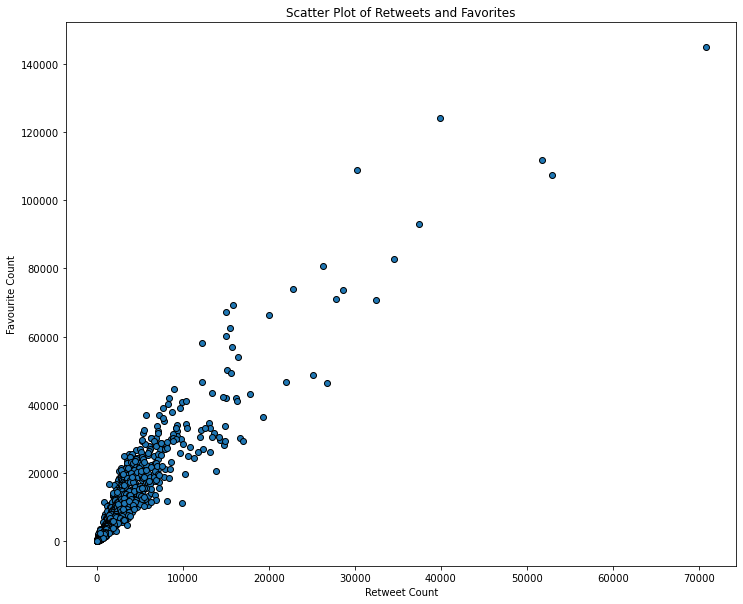

In [53]:
# sub-dataset for only the two columns favorite_count and retweet_count
counts = tweets_df[['retweet_count','favourite_count']]
counts.reset_index(drop = True, inplace = True)

# scatter plot of retweets and favourites counts
plt.figure(figsize = (12, 10))
plt.title('Scatter Plot of Retweets and Favorites')
plt.xlabel('Retweet Count')
plt.ylabel('Favourite Count')

plt.scatter(x = counts.retweet_count, y = counts.favourite_count, edgecolors = 'black');

#### 2. Accuracy of Prediction

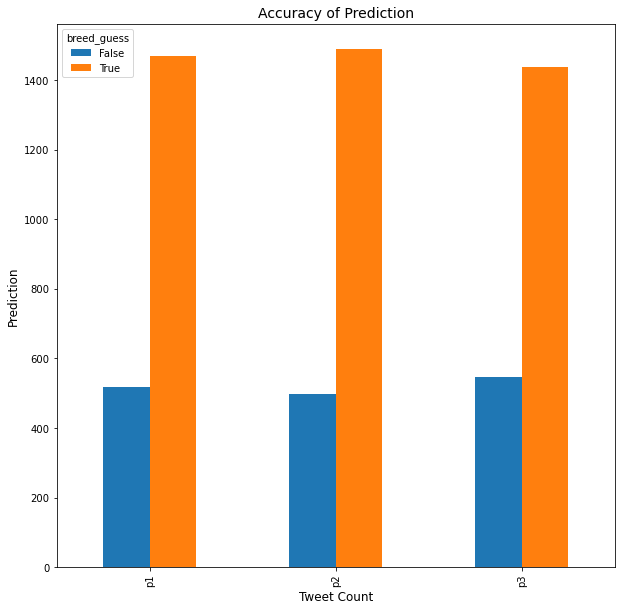

In [54]:
# bar plot of accuracy of prediction being a valid dog breed
eda_df = images_df.groupby(['prediction','breed_guess']).size()
eda_df = eda_df.unstack()
eda_df.plot(kind = 'bar', figsize = (10,10))

x = [0,1,2]
cx = plt.subplot()
cx.set_xticks(x)
cx.set_xticklabels(['p1','p2','p3'])

plt.title('Accuracy of Prediction', fontsize=14)
plt.xlabel('Tweet Count', fontsize=12)
plt.ylabel('Prediction', fontsize=12);

### 3. Most Popular Source of Tweets

In [55]:
tweets_df.source.unique()

array(['Twitter for iPhone', 'Twitter Web Client', 'TweetDeck'],
      dtype=object)

In [56]:
tweets_df.source.value_counts()

Twitter for iPhone    1948
Twitter Web Client      28
TweetDeck               10
Name: source, dtype: int64

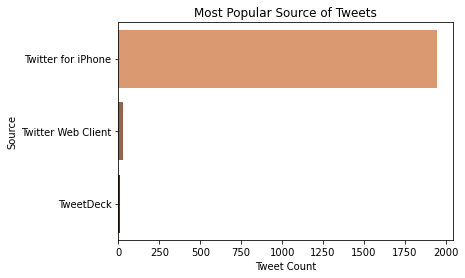

In [57]:
# seaborn count plot of the sources of tweets
sns.countplot(y='source', palette= "copper_r",
              data=tweets_df).set(title='Most Popular Source of Tweets',xlabel='Tweet Count', ylabel='Source');
